#Warehouse Route Optimization Task: Q-Learning for Robotics Application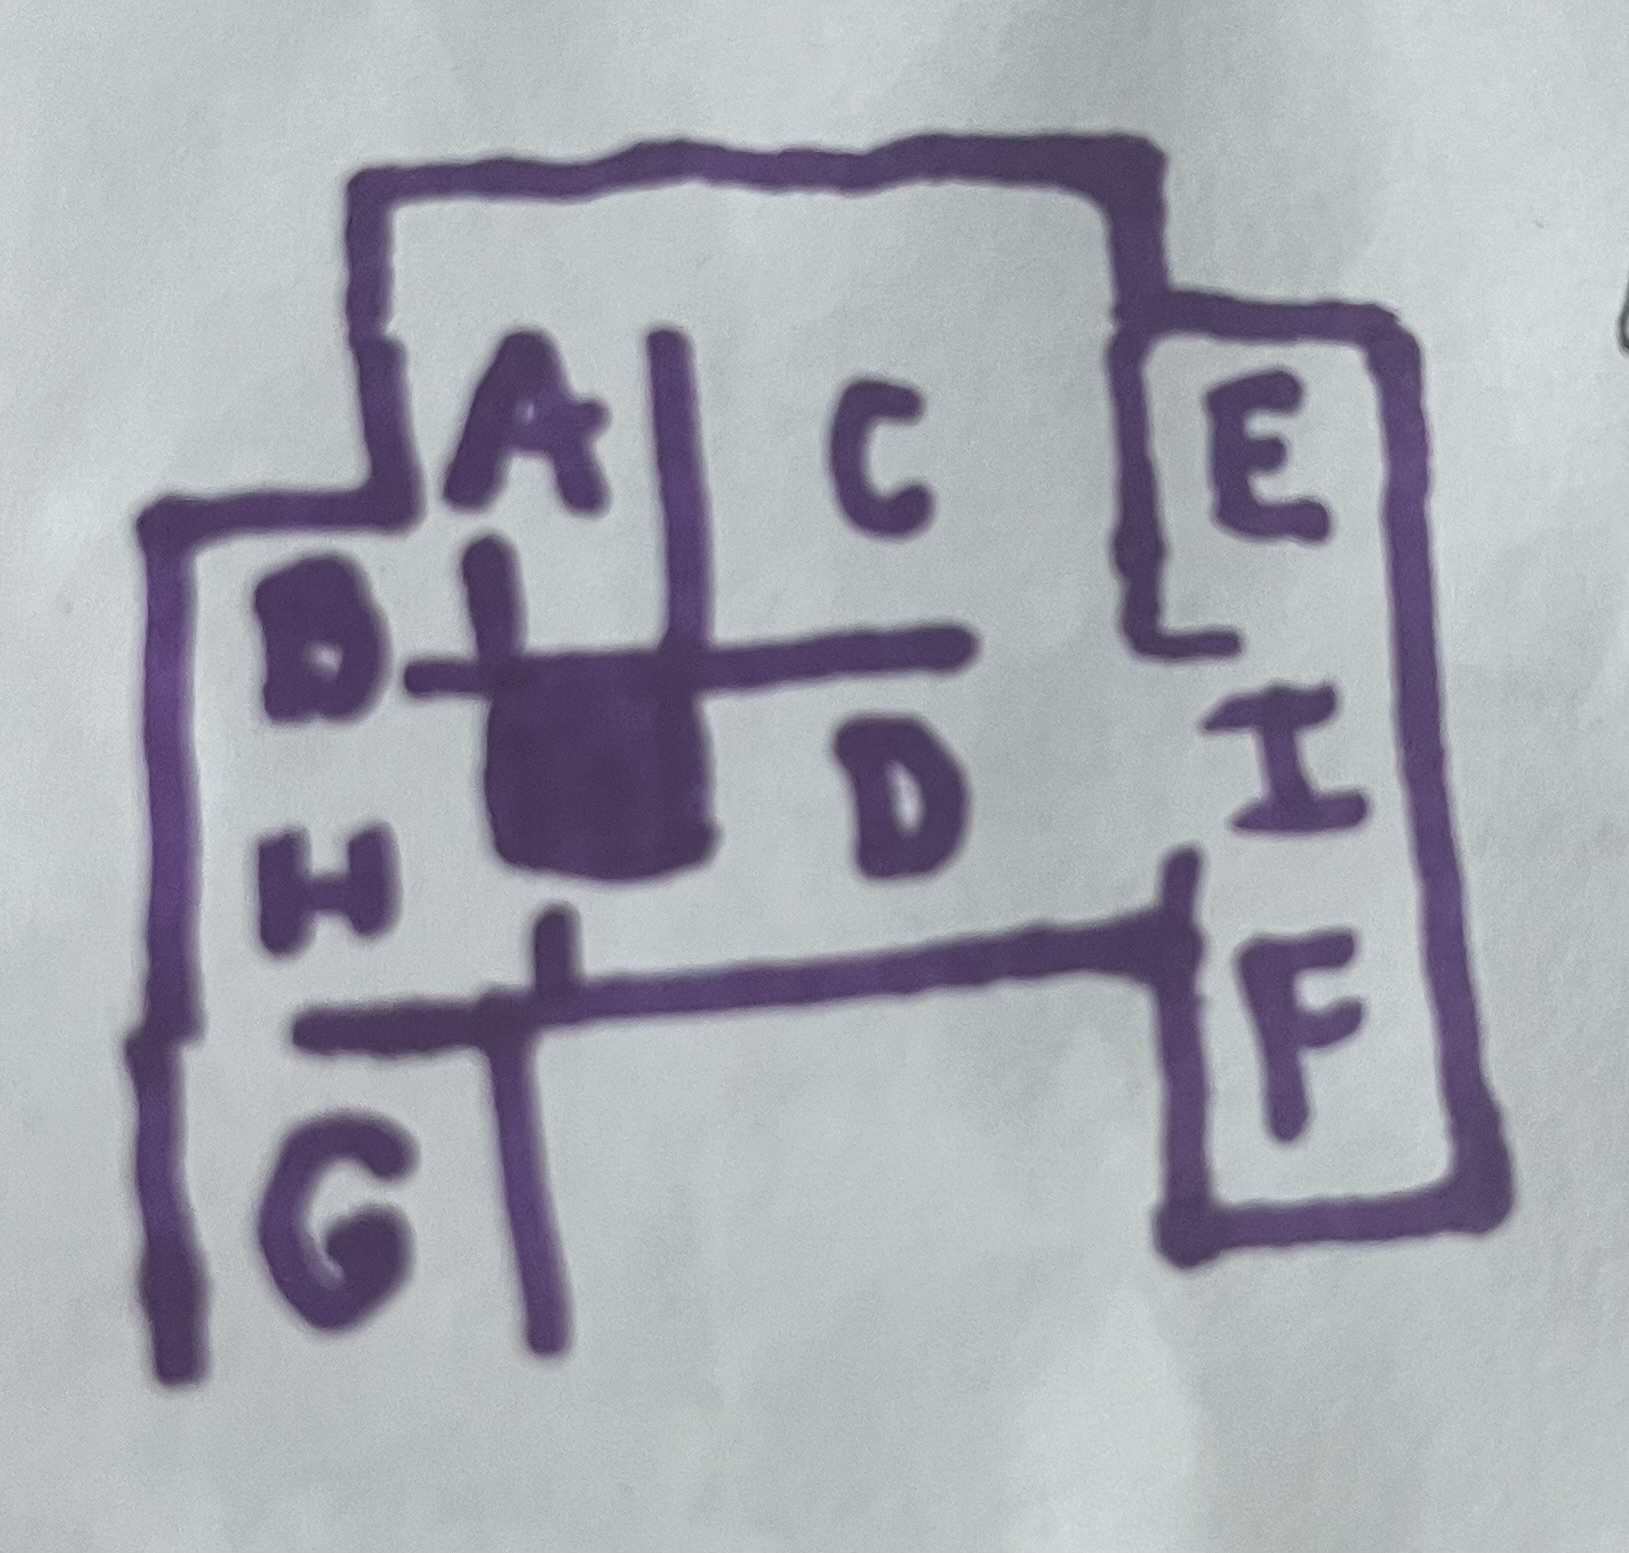 (fundamental AI algo)

In [ ]:
import numpy as np

#Temporal Difference:
TD_t(s_t, a_t) = R(s_t, a_t) + γmax(Q(s_(t+1), a)) − Q(s_t, a_t)

#Bellman Equation:
Q_t(s_t, a_t) = Q_(t−1)(s_t, a_t) + α*TD_t(s_t, a_t)

In [ ]:
def qLearnRoute(starting_location, ending_location):
  location_to_state = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}
  state_to_location = {state: location for location, state in location_to_state.items()}

  # Reward Function - Matrix displaying allowed movements and granting rewards to potential actions from state s to next state s' given action a
  R = np.array([[0, 1, 1, 0, 0, 0, 0, 0, 0],
                [1, 0, 0, 0, 0, 0, 0, 1, 0],
                [1, 0, 0, 1, 0, 0, 0, 0, 1],
                [0, 0, 1, 0, 0, 0, 0, 1, 1],
                [0, 0, 0, 0, 0, 0, 0, 0, 1],
                [0, 0, 0, 0, 0, 0, 0, 0, 1],
                [0, 0, 0, 0, 0, 0, 0, 1, 0],
                [0, 1, 0, 1, 0, 0, 1, 0, 0],
                [0, 0, 0, 1, 1, 1, 0, 0, 0]])

  Q = np.array(np.zeros([9, 9]))

  # Parameters - discount factor (gamma) and learning rate (alpha)
  gamma = 0.9
  alpha = 0.8

  R_new = R.copy()
  ending = location_to_state[ending_location]
  R_new[ending, ending] = 100
  for i in range(800):
    # select random starting state from our vectors
    curr_state = np.random.randint(0,9)
    allowed_actions = []
    for j in range(9):
      if R_new[curr_state, j] > 0:
        allowed_actions.append(j)
    next_state = np.random.choice(allowed_actions)
    # pi* = np.argmax(Q[next_state,]) - optimal policy
    td = R_new[curr_state, next_state] + gamma * Q[next_state, np.argmax(Q[next_state,])] - Q[curr_state, next_state]
    Q[curr_state, next_state] = Q[curr_state, next_state] + alpha * td
  print('Q matrix after learning: \n',Q)

  route = [starting_location]
  curr = starting_location
  while (curr != ending_location):
      starting_state = location_to_state[curr]
      next_state = np.argmax(Q[starting_state,])
      curr = state_to_location[next_state]
      route.append(curr)
  return route

qLearnRoute('A', 'G')

Q matrix after learning: 
 [[  0.         710.21763204 630.73896223   0.           0.
    0.           0.           0.           0.        ]
 [630.9018234    0.           0.           0.           0.
    0.           0.         793.02059828   0.        ]
 [639.82390111   0.           0.         699.73020978   0.
    0.           0.           0.         630.77216584]
 [  0.           0.         630.66605536   0.           0.
    0.           0.         792.56237678 630.84734868]
 [  0.           0.           0.           0.           0.
    0.           0.           0.         630.85979996]
 [  0.           0.           0.           0.           0.
    0.           0.           0.         630.86023242]
 [  0.           0.           0.           0.           0.
    0.         978.4106256  794.03901961   0.        ]
 [  0.         713.81835098   0.         699.86806108   0.
    0.         881.41185162   0.           0.        ]
 [  0.           0.           0.         699.84612495 565.992

['A', 'B', 'H', 'G']